In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ai-w10p1/train.csv
/kaggle/input/2022-ai-w10p1/test.csv
/kaggle/input/2022-ai-w10p1/sample_submit.csv


In [2]:
# package install
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [3]:
#gpu 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# data 
train = pd.read_csv('../input/2022-ai-w10p1/train.csv')
train

,Category,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train.iloc[:,1:]
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train.iloc[:,0]
y_train

0        5
1        0
2        3
3        3
4        6
        ..
59995    0
59996    3
59997    9
59998    4
59999    6
Name: Category, Length: 60000, dtype: int64

In [7]:
x_test = pd.read_csv('../input/2022-ai-w10p1/test.csv')
x_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 100

In [9]:
# #minmaxscaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [10]:
# import cv2
# example = np.array(
#     [
#     [[0,1,2],
#      [3,4,5]],
#     [[6,7,8],
#      [9,10,11]],
#     ])

# print(example.shape)

# print("-----------------------")
# example2 = cv2.resize(example.astype('float32'),dsize=(3,3),interpolation=cv2.INTER_LINEAR)

# print(example2.shape)
# print(example2)

# print("-----------------------")
# example3 = cv2.resize(example.astype('float32'),dsize=(4,4),interpolation=cv2.INTER_LINEAR)

# print(example3.shape)
# print(example3)

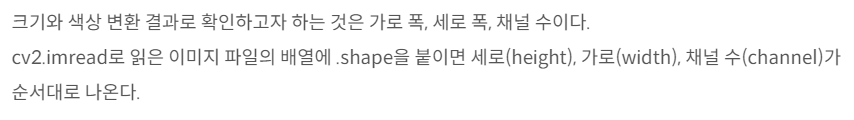


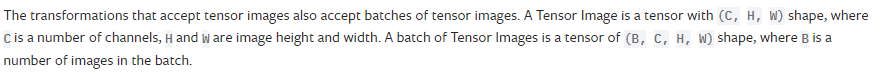

In [11]:
# transform2_ = transforms.Compose(
#     [transforms.ToTensor()])
# '''
# ,
#      transforms.Normalize((0, 0, 0), (1, 1, 1))
# '''

In [12]:
# example = np.array(
#     [
#     [[0,1,2],
#      [3,4,5]],
#     [[6,7,8],
#      [9,10,11]],
#     ])
# print(example)
# print(example.shape)
# print("----------------------")
# # example2 = torch.permute(example, (2,1,0))
# # example2 = np.array(example2)
# # print(example2)
# # print(example2.shape)
# # print("----------------------")

# ex = transform2_(example)
# print(ex)
# print(ex.shape)

# print("----------------------")
# ex2 = torch.FloatTensor(example2)
# print(ex2)
# print(ex2.shape)

In [13]:
# import cv2
# data_1ch = np.reshape(x_train, (-1, 28, 28, 1)) # (60000, 28, 28, 1) 
# #1ch 의 MNIST이미지를 3ch 로 변환 
# data_3ch =  np.repeat(data_1ch, 3, axis=-1)
# data_3ch = data_3ch.astype(np.uint8)
# print(data_3ch.shape) # (60000, 28, 28, 3)

# print(data_3ch[0].shape) # (28, 28, 3)

# resized_data_3ch = cv2.resize(data_3ch[0], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
# print(resized_data_3ch.shape) # (224, 224, 3)
# print(resized_data_3ch)
# print("-----------------------")
# resized_data_3ch = np.transpose(resized_data_3ch,(2,1,0))
# print(resized_data_3ch.shape)
# print(resized_data_3ch)
# print("-----------------------")
# resized_data_3ch = transform(resized_data_3ch)
# print(resized_data_3ch.shape) # torch.Size([3, 224, 224])
# print(resized_data_3ch)

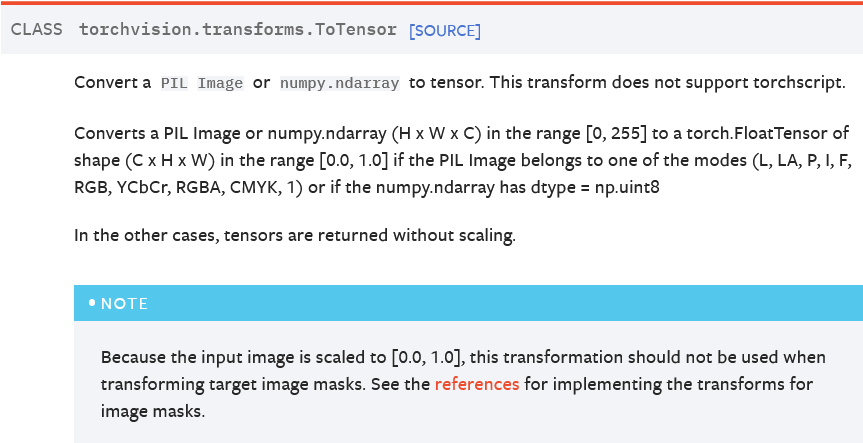

In [14]:
import cv2
import torch
import torchvision
import torchvision.transforms as transforms

class Custom_Loader(torch.utils.data.Dataset):
    def __init__(self, data, label=None, split='train', transform=None):
        self.label = label
        self.split = split
        self.transform = transform
        
        # csv 파일로부터 얻어진 데이터를 28, 28, 1로 shape 변환
        # (60000,784) -> (60000, 28, 28, 1)
        data_1ch = np.reshape(np.array(data), (-1, 28, 28, 1))
        # 1ch 의 MNIST이미지를 3ch 로 변환 
        data_3ch =  np.repeat(data_1ch, 3, axis=-1)
        # data 인스턴스에 변환한 데이터 저장
        self.data = data_3ch.astype(np.uint8)

    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # idx번째 데이터를 data에 저장
        data = self.data[idx]  # shape (28, 28, 3)
        
        # 28x28 이미지를 224x224로 resize # shape (224, 224, 3)
        data = cv2.resize(data, dsize=(224, 224), interpolation=cv2.INTER_LINEAR) # shape (224, 224, 3)
        
        # Tensor 변환 및 Normalization 
        data = self.transform(data)
        
        # train loader 일 경우 data, label 반환
        if self.split == 'train':
            return data, torch.from_numpy(np.array(self.label[idx]))
        else:
        # test 일 경우, data만 반환 
            return data
        

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = Custom_Loader(x_train, y_train, split='train', transform=transform)
test_dataset = Custom_Loader(x_test, split='test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [15]:
import torchvision.models as models

method = "vgg"

if method == "resnet":
    model = models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(in_features=512, out_features=10, bias=True)
elif method == "vgg":
    model = models.vgg16(pretrained=True)
    model.classifier[6] = torch.nn.Linear(in_features=4096, out_features=10, bias=True)
elif method == "alexnet":
    model = models.alexnet(pretrained=True)
    model.classifier[6] = torch.nn.Linear(in_features=4096, out_features=10, bias=True)
else:
    raise ValueError("Check Method!")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [16]:
# mnist_dnn 예제와 동일
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
# model
model = model.to(device)

In [18]:
# mnist_dnn 예제와 동일: X데이터 View로 변환하지 않는 부분만 다름
# 주의: 2D => 1D로 변경할 필요 없음

#train my model
total_batch = len(train_loader)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    avg_accuracy = 0

    for X, Y in train_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
        correct_prediction = torch.argmax(hypothesis, 1) == Y
        accuracy = correct_prediction.sum() / len(Y)
        
        avg_accuracy += accuracy / total_batch
        
    print('[Epoch: {:>4}] cost = {:>.9} accuracy = {:.6f}'.format(epoch + 1, avg_cost,avg_accuracy))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.335237622 accuracy = 0.890434
[Epoch:    2] cost = 0.0716178641 accuracy = 0.979916
[Epoch:    3] cost = 0.077787742 accuracy = 0.978717
[Epoch:    4] cost = 0.0596857518 accuracy = 0.983899
[Epoch:    5] cost = 0.0420204513 accuracy = 0.988665
[Epoch:    6] cost = 0.0386645198 accuracy = 0.989182
[Epoch:    7] cost = 0.0561530255 accuracy = 0.985199
[Epoch:    8] cost = 0.040340092 accuracy = 0.989365
[Epoch:    9] cost = 0.0265703015 accuracy = 0.992914
[Epoch:   10] cost = 0.0709782392 accuracy = 0.984133
Learning Finished!


In [19]:
# # mnist_dnn 예제와 동일: X데이터 View로 변환하지 않는 부분만 다름
# 주의: 2D => 1D로 변경할 필요 없음

# Test model and check accuracy
result = []
with torch.no_grad():
    for X in test_loader:
        X = X.to(device)  
        hypothesis = model(X)
        
        prediction = torch.argmax(hypothesis, 1)
        
        for i in range(len(prediction)):
            result.append(prediction[i].cpu().item())


In [20]:
#submit
submit = pd.read_csv('../input/2022-ai-w10p1/sample_submit.csv')
submit

,Id,Category
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0


In [21]:
submit['Category'] = result
submit

,Id,Category
0,0,6
1,1,1
2,2,0
3,3,0
4,4,9
...,...,...
9995,9995,3
9996,9996,7
9997,9997,2
9998,9998,8


In [22]:
submit.to_csv('submit.csv',index=None)